(As of mid september 2022)

# Visualizing results from the Experiments.

The output files contain many different variables, but in the end they can all be plotted rather similarly.
I want to provide code for the following types of plots (and subplot structures for combining them).
Preliminary plotting code. The plots for the preprocessing (correlation-distance, mean model/simulation ...) is done in a separate notebook (notebook_misc/basic_plots.ipynb)


- Plots:
    - Map for Evaluation Metric (e.g) Correlation. 
    - Diffplot comparing two reconstruction metrics (e.g Sisal vs Iso2k locations)
    - Panels combining these types of plots for different configurations/models/... The main thing is a shared colorbar. Although it's tempting, I try to not make it too overwhelming.
    
     - Foreign model experiments (Parsons 2021 , King 2021 also has a nice plot panel in fig 2, for swarmplot look https://github.com/amrhein/Structural_uncertainties/blob/main/prior_truth_last1000_Nens_400_analysis.ipynb)
    - Reconstruction metrics when reusing proxies on multiple timescales (for different SNR, this is my new thing, reusing proxies may be an option!)
    
    - Reconstructed variable plot:
        - Hovmöllerplot for timeseries
        - GMT Plots for different models, annomaly option.
      

In [4]:
import sys
sys.path.append('/home/mchoblet/paleoda')
import xarray as xr
import numpy as np

from types import SimpleNamespace

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import cartopy.crs as ccrs
from scipy.stats import linregress
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  

import warnings

import psm_pseudoproxy
import utils 
import evaluation

import pandas as pd

from matplotlib.offsetbox import AnchoredText    

In [6]:
%load_ext autoreload
%autoreload 2

## Experiment 0

In [7]:
paths={'Echam':[
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_sisal.nc'],
'GISS':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_sisal.nc'],
'iCESM':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_sisal.nc'],
'iHadCM3':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_sisal.nc'],
'isoGSM':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/isoGSM_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/isoGSM_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/isoGSM_sisal.nc']
}



In [9]:
sis=xr.open_dataset(paths['Echam'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['Echam'][1])['tsurf_Corr']
(sis-iso).plot()

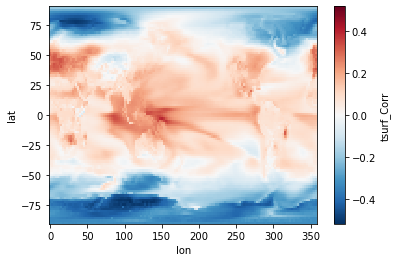

In [11]:
sis=xr.open_dataset(paths['iCESM'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['iCESM'][1])['tsurf_Corr']
(sis-iso).plot()

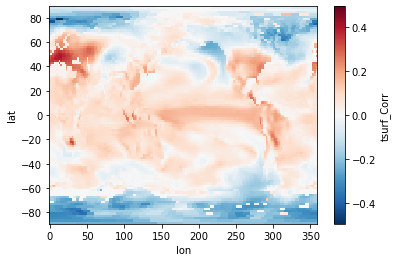

In [12]:
sis=xr.open_dataset(paths['isoGSM'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['isoGSM'][1])['tsurf_Corr']
(sis-iso).plot()

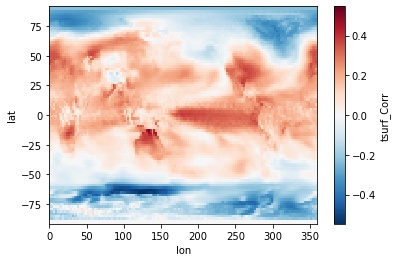

In [13]:
sis=xr.open_dataset(paths['GISS'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['GISS'][1])['tsurf_Corr']
(sis-iso).plot()

In [6]:
sis=xr.open_dataset(paths['iHadCM3'][2])

In [7]:
sis['tsurf_mean'].values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [ ]:
s

In [36]:
paths_dic['Echam']

['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_both.nc',
 '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_iso2k.nc',
 '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_sisal.nc']

In [40]:
for i,(p,v) in enumerate(paths_dic.items()):
    print(i,p,v)

0 Echam ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_sisal.nc']
1 GISS ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_sisal.nc']
2 iCESM ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_sisal.nc']
3 iHadCM3 ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_sisal.nc']
4 isoGSM ['/home/mchoblet/pa

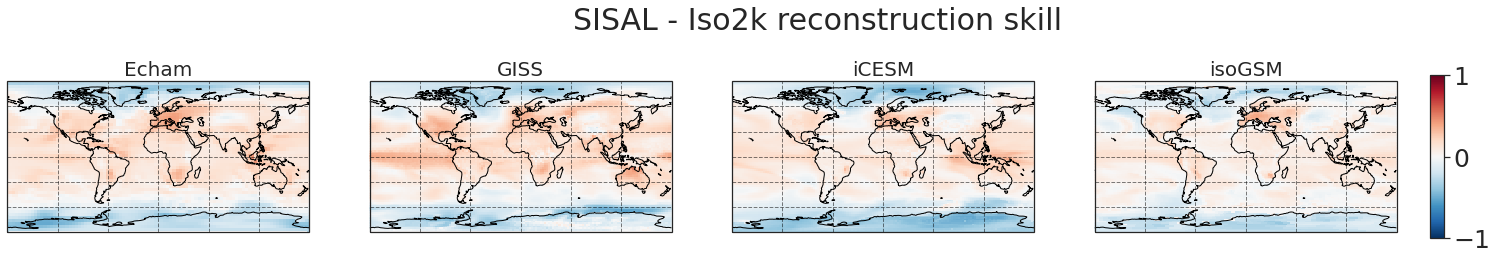

In [19]:
# Difference plot
def plot_dif(paths_dic,metric='Corr',title='Temperature reconstruction from $\delta^{18}$O (SNR=5)'):
    pass
#vars=['tsurf','pr','d18O']

metric='Corr'
title='SISAL - Iso2k reconstruction skill'
paths_dic=paths

sns.set_theme(style="white")

ncols=4
figsize=(30,6)
fig, axes = plt.subplots(ncols=ncols,nrows=1,sharex=False,sharey=True,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
plt.suptitle(title,fontsize=30,y=0.85)

j=0
for i,(p,v) in enumerate(paths_dic.items()):
    if p!='iHadCM3':
        strg='tsurf_'+metric
        sisal=xr.open_dataset(paths_dic[p][2])[strg]
        iso2k=xr.open_dataset(paths_dic[p][1])[strg]

        ax=axes[j]
        j+=1
        trans=ccrs.PlateCarree()

        #set colorbar limits
        if metric in ['Corr','CE']:
            vmin=-1
            vmax=1
            cmap='RdBu_r'

        colorbar=False
        plot=(sisal-iso2k).plot(ax=ax,transform=trans,x='lon',y='lat',add_colorbar=colorbar,vmin=vmin,vmax=vmax,cmap=cmap)

        ax.axes.xaxis.set_visible(True)
        ax.axes.yaxis.set_visible(True)
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        ax.add_feature(cfeature.COASTLINE)
        ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')

        #suppress all unwanted titles created by xrray
        ax.set_title(p,fontsize=20)

        ax.set_xlabel('',fontsize=30,rotation=0)
        ax.set_ylabel('',fontsize=30,rotation=0)
        ax.yaxis.set_label_coords(-0.15,0.4)

cbar=fig.colorbar(plot,ax=axes.ravel().tolist(),shrink=0.5,aspect=12,pad=0.02)
cbar.ax.tick_params(labelsize=25)

savefig='sisal_vs_iso'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')
plt.show()

#plt.tight_layout() 

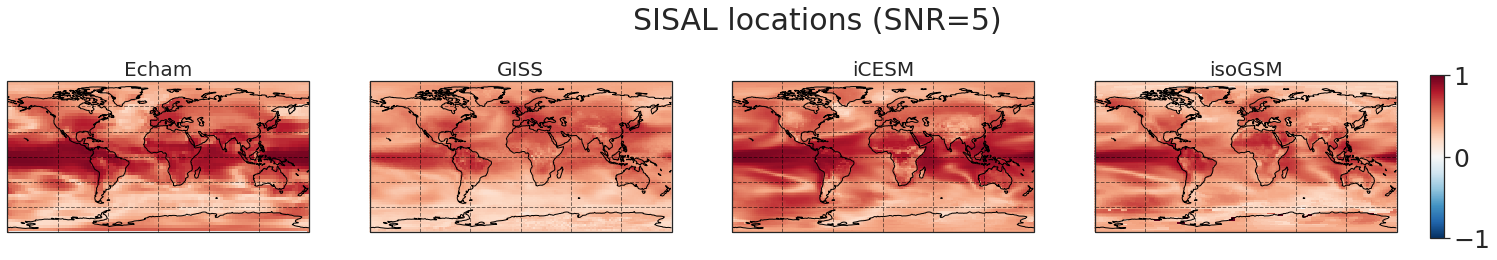

In [16]:
metric='Corr'
title='SISAL locations (SNR=5)'
paths_dic=paths

sns.set_theme(style="white")

ncols=4
figsize=(30,6)
fig, axes = plt.subplots(ncols=ncols,nrows=1,sharex=False,sharey=True,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
plt.suptitle(title,fontsize=30,y=0.85)

j=0
for i,(p,v) in enumerate(paths_dic.items()):
    if p!='iHadCM3':
        strg='tsurf_'+metric
        sisal=xr.open_dataset(paths_dic[p][2])[strg]
        #iso2k=xr.open_dataset(paths_dic[p][1])[strg]

        ax=axes[j]
        j+=1
        trans=ccrs.PlateCarree()

        #set colorbar limits
        if metric in ['Corr','CE']:
            vmin=-1
            vmax=1
            cmap='RdBu_r'

        colorbar=False
        plot=(sisal).plot(ax=ax,transform=trans,x='lon',y='lat',add_colorbar=colorbar,vmin=vmin,vmax=vmax,cmap=cmap)

        ax.axes.xaxis.set_visible(True)
        ax.axes.yaxis.set_visible(True)
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        ax.add_feature(cfeature.COASTLINE)
        ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')

        #suppress all unwanted titles created by xrray
        ax.set_title(p,fontsize=20)

        ax.set_xlabel('',fontsize=30,rotation=0)
        ax.set_ylabel('',fontsize=30,rotation=0)
        ax.yaxis.set_label_coords(-0.15,0.4)

cbar=fig.colorbar(plot,ax=axes.ravel().tolist(),shrink=0.5,aspect=12,pad=0.02)
cbar.ax.tick_params(labelsize=25)

savefig='sisal_corr'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')
plt.show()


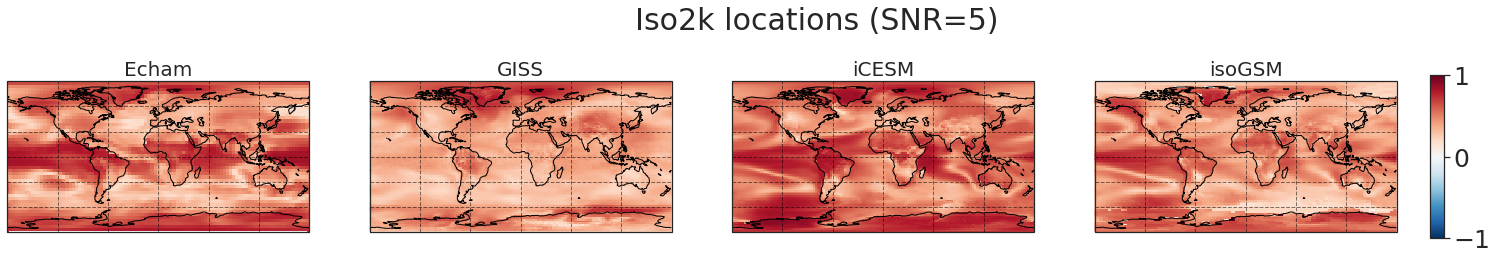

In [17]:
metric='Corr'
title='Iso2k locations (SNR=5)'
paths_dic=paths

sns.set_theme(style="white")

ncols=4
figsize=(30,6)
fig, axes = plt.subplots(ncols=ncols,nrows=1,sharex=False,sharey=True,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
plt.suptitle(title,fontsize=30,y=0.85)

j=0
for i,(p,v) in enumerate(paths_dic.items()):
    if p!='iHadCM3':
        strg='tsurf_'+metric
        sisal=xr.open_dataset(paths_dic[p][1])[strg]
        #iso2k=xr.open_dataset(paths_dic[p][1])[strg]

        ax=axes[j]
        j+=1
        trans=ccrs.PlateCarree()

        #set colorbar limits
        if metric in ['Corr','CE']:
            vmin=-1
            vmax=1
            cmap='RdBu_r'

        colorbar=False
        plot=(sisal).plot(ax=ax,transform=trans,x='lon',y='lat',add_colorbar=colorbar,vmin=vmin,vmax=vmax,cmap=cmap)

        ax.axes.xaxis.set_visible(True)
        ax.axes.yaxis.set_visible(True)
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        ax.add_feature(cfeature.COASTLINE)
        ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')

        #suppress all unwanted titles created by xrray
        ax.set_title(p,fontsize=20)

        ax.set_xlabel('',fontsize=30,rotation=0)
        ax.set_ylabel('',fontsize=30,rotation=0)
        ax.yaxis.set_label_coords(-0.15,0.4)

cbar=fig.colorbar(plot,ax=axes.ravel().tolist(),shrink=0.5,aspect=12,pad=0.02)
cbar.ax.tick_params(labelsize=25)

#plt.tight_layout()
savefig='iso2k_corr'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')
plt.show()

# Foreign model experiments

In [93]:
paths_echam=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_Echam_prior.nc', '/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_isoGSM_prior.nc']
paths_giss=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_isoGSM_prior.nc']
paths_icesm=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_isoGSM_prior.nc']
#paths_ihad=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_isoGSM_prior.nc']
paths_isogsm=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/isoGSM_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/isoGSM_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/isoGSM_PP_isoGSM_prior.nc']




In [104]:
models=np.concatenate([np.repeat([i],4) for i in ['Echam','GISS','iCESM','isoGSM']])
priors=np.vstack([np.repeat([i],4) for i in ['Echam','GISS','iCESM','isoGSM']]).T.reshape(-1)

In [96]:
correlations=[]
rang=4
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_echam[i])['tsurf_Corr'],'corr').values)
print('')
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_giss[i])['tsurf_Corr'],'corr').values)
print('')
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_icesm[i])['tsurf_Corr'],'corr').values)
print('')
#for i in range(rang):
#    correlations.append(utils.globalmean(xr.open_dataset(paths_ihad[i])['tsurf_Corr'],'corr').values)
print('')
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_isogsm[i])['tsurf_Corr'],'corr').values)

In [98]:
correlations=np.array(correlations)

In [105]:
df=pd.DataFrame(data=[models,priors,correlations]).T
df.columns=['model','prior','correlation']

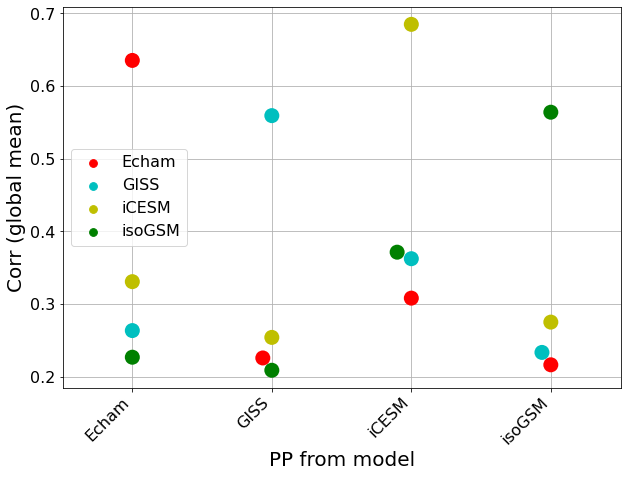

In [117]:
savefig='alt_phys'

model_list=['Echam','GISS','iCESM','isoGSM']
si = 15
fig = plt.figure(figsize=(10,7))
ax=sns.swarmplot(data=df,x="model", y="correlation", hue="prior",size=si,marker='o',palette=["r", "c", "y","g","b"],)
#ax=sns.swarmplot(data=df,x="model", y="correlation", hue="model",size=si,marker='.',palette=["r", "c", "y","g","b"])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(np.arange(len(model_list)),model_list)
plt.xlabel('PP from model',fontsize=20)
plt.xticks(rotation=45,ha="right",fontsize=16)
plt.ylabel('Corr (global mean)',fontsize=20)
plt.yticks(fontsize=16)

l = plt.legend(handles[0:4], labels[0:4], loc='center left',frameon=True,fontsize=16)
#plt.tight_layout()

# For final paper figure
plt.grid()
#ax.legend_.remove()
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')


In [ ]:
base_path='/home/mchoblet/paleoda/results/experiments/PPE_altphys_debiased'

In [ ]:
# https://stackoverflow.com/questions/44552489/plotting-multiple-boxplots-in-seaborn
# /home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/
# https://seaborn.pydata.org/examples/grouped_boxplot.html

In [72]:
def create_dataframe(basepath='/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/',
                        models=['iCESM','Echam','GISS','iHadCM3','isoGSM'],
                        priors=['iCESM','mme','Echam','mme','GISS','mme','iHadCM3','mme','isoGSM','mme'],
                        configs=[['no_psm','inf','inf_frac_m','inf_frac_reg']],
                         metric='tsurf_Corr',metric_name='Corr'):
        """
        Returns all global-metrics in a Dataframe form.
        Basepath with / at the end.
        """
        
        #create Dataframe Columns
        models_col=np.repeat(models,4*2,axis=0)
        priors_col=np.repeat(priors,4,axis=0)
        configs_col=np.concatenate(np.repeat(configs,10,axis=0))
        
        #loop over models and compute the metric
        results=[]
        for mod in models:
            #loop over configs
            for c in configs[0]:
                #print(mod)
                #print(basepath)
                #print(c)
                string= str(basepath)+str(mod) + '_PP_' + str(c) +'.nc'
                #load_values:
                data=xr.open_dataset(string)[metric]
                results.append(data.values.reshape(-1))
            
            #now for multimodel ensemble
            #loop over configs
            for c in configs[0]:
                string=basepath+mod + '_PP_'+c+'_mme.nc'
                data=xr.open_dataset(string)[metric]
                results.append(data.values.reshape(-1))
            
            
        all_data={
            'config': configs_col,
            'values':results,
            'model': models_col,
            'prior':priors_col,}
        
        
        df=pd.DataFrame(all_data)
        return df

def box_plot(df, name='', model='iCESM' ,#['iCESM','Echam','GISS','iHadCM3','isoGSM'], 
             configs=['no psm','inf. weighting','+ frac (mean)','+ frac (regular)'],
             metric_name='Corr',
             savename=None):
    
    sns.set_palette("colorblind")
    #cut down dataframe to the one model
    
    #dataframe for current model
    df=df[df['model']==model].explode('values')
    
    fig = plt.figure(figsize=(12,7))
    sns.boxplot(x="config", y="values",
            hue="prior",
            data=df)

    handles, labels = ax.get_legend_handles_labels()
    plt.xticks(np.arange(4),configs)
    plt.xlabel('Configuration',fontsize=20)
    plt.xticks(rotation=45,ha="right",fontsize=16)
    plt.ylabel(metric_name,fontsize=20)
    plt.yticks(fontsize=16)
    #plt.legend(handles, labels, loc='lower left',frameon=True,fontsize=14)
    
    if savename is not None:
        strg='/home/mchoblet/paleoda/results/plots/'+savename+'.pdf'
        plt.savefig(strg, format='pdf',bbox_inches='tight')


In [67]:
'iCESM'+'/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/'+'inf_frac_reg'

'iCESM/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/inf_frac_reg'

In [86]:
model='iCESM'
df=df[df['model']==model][df['config']=='no_psm']#.explode('values')

/tmp/ipykernel_413769/2184164568.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[df['model']==model][df['config']=='no_psm']#.explode('values')


In [87]:
df

,config,values,model,prior
0,no_psm,"[0.19143207967559572, 0.18519113487821984, 0.1...",iCESM,iCESM
4,no_psm,"[0.016942081212080032, 0.02091267741751349, 0....",iCESM,mme


In [93]:
print(utils.globalmean(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/Echam_PP_inf.nc')['tsurf_Corr']).values)
print(utils.globalmean(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/Echam_PP_inf_frac_reg.nc')['tsurf_Corr']).values)
print(utils.globalmean(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/Echam_PP_inf_frac_m.nc')['tsurf_Corr']).values)

0.3383232561662742
0.341907602044719
0.3383016656730206


<xarray.DataArray 'gm_' ()>
array(0.3419076)

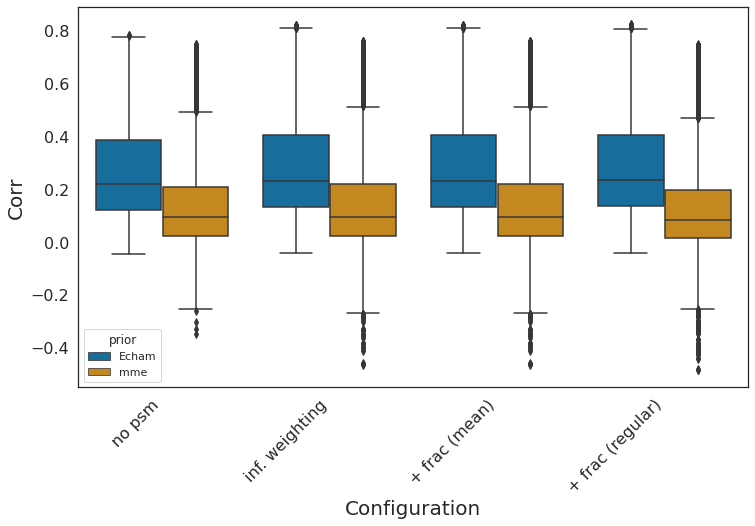

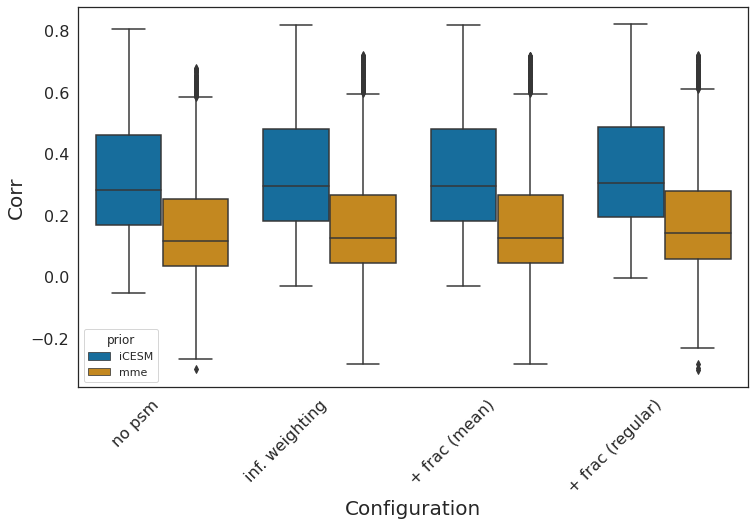

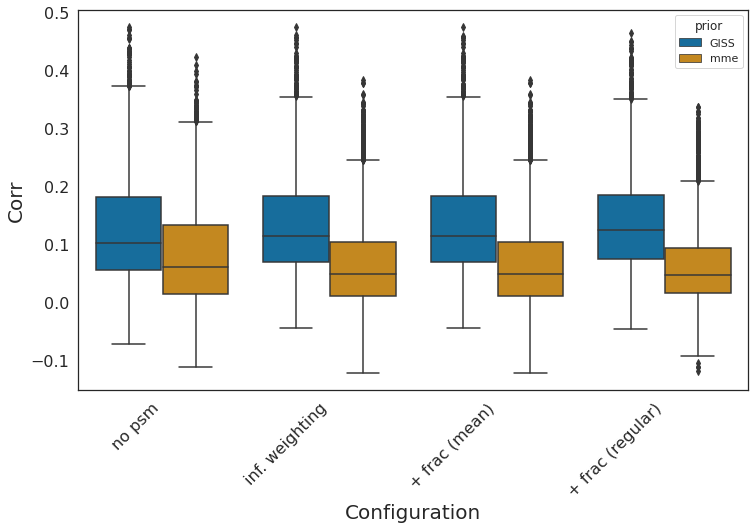

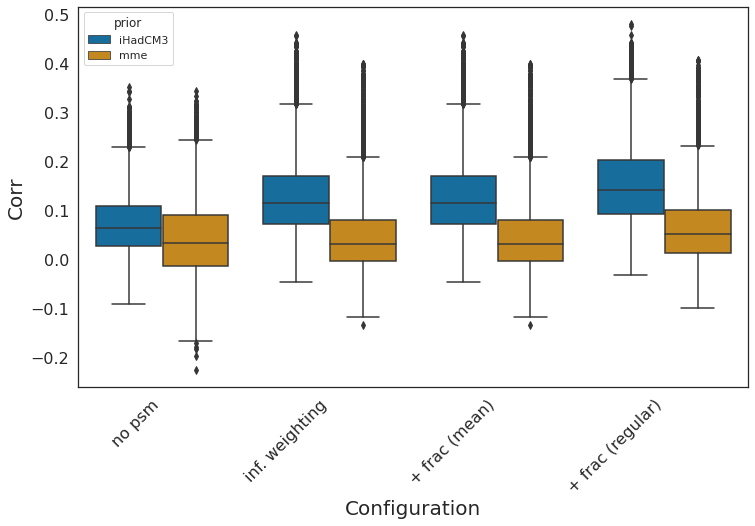

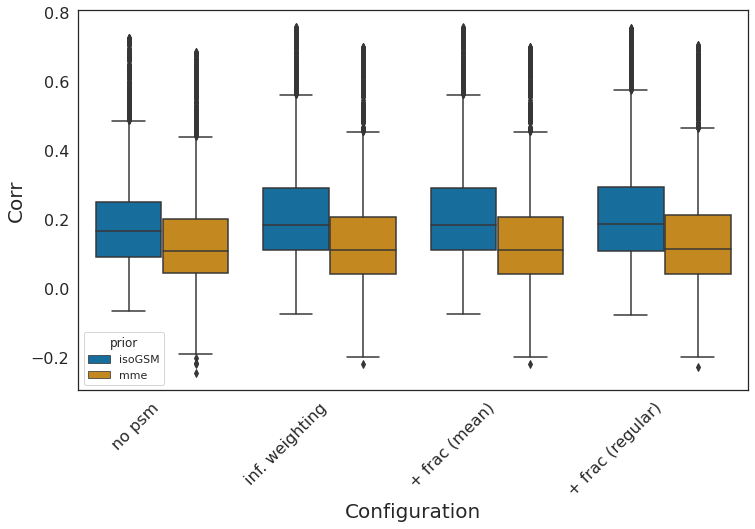

In [85]:
df=create_dataframe(basepath='/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/',
                        models=['iCESM','Echam','GISS','iHadCM3','isoGSM'],
                        priors=['iCESM','mme','Echam','mme','GISS','mme','iHadCM3','mme','isoGSM','mme'],
                        configs=[['no_psm','inf','inf_frac_m','inf_frac_reg']],
                         metric='tsurf_Corr',metric_name='Corr')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='Echam')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='iCESM')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='GISS')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='iHadCM3')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='isoGSM')

In [99]:
###CONFIG DICTIONARY

#lists are sometimes necessary, especially if we use multiple proxy-DBs (e.g. SISAL and iso2k)
#and multiple timescales

cfg = {
#BASIC PARAMS
'vp':{
'd18O':'/home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc',
'tsurf': '/home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc',
'evap': '/home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc',
'slp': None,
},
'oro': None,
'reconstruct':['tsurf','d18O','prec'], 
'output_folder':'PPE_speleopsm', #in cwd
'output_file':'dummy',
 'multi_model_prior': None, #None or a list where the first entry is a dictionary of dictionaries for the file paths and secord a dictionary with the orography files
'avg':None, 
'seed': 42, 
'check_nan':True, #mainly needed for iHadCM3, because of its missing years nans are introduced with 'resampled'
###PROXYS
'obsdata':['/home/mchoblet/paleoda/data/proxy_dbs/sisal_db.nc'],
'obs_var':[['d18O','d18O_precision']], #name of variables and uncertainties in proxy_db files
'proxy_error': [0.1], #irrelevant for PPE
'time_scales': ['median'], 
'proxy_time':['0851','1849'], 
'resample': True,
'resample_mode': 'nearest',
'mask': 3, 
###MULTI-TIMESCALE
'timescales':[1], #list of timescales (have to be true divisors of longest timescale (block size)) Timescale 1 always required! 
'reuse': True, #e.g if a yearly resolved proxy is also to be used in the 5,10 year mean reconstruction
###PSM
'psm':[None], 
'interpol': 'dw',#None, #None/'dw'
'var_psm': ['d18O'] ,
'speleo':{
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'mean', #'regular'
    'filter': False, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
},
'icecore':{
    'weighting':'prec', #None(pure d18O) / prec (d180 prec weighted)
    'height': False, #height correction: True requires orography of model and 'elev' coordinate for proxy_db. Requires that proxy_db has a coordinate 'lapse rate' (e.g. i attributed -0.15 to non polar porxies and -0.28 to polar ones (per 100m)
    'filter': False, #If True the PSM-function from PRYSM which takes into account diffusion is applied. 
},
#currently this only works for one Database files, probably at some point that needs to be more flexible
'linear':{
    'variable': 'tsurf' , #variable to regress against
    'type': 'anom' , #absolute value or anomaly
    'anom_time': None , #None for full simulation, or time-list 
    'uniform': None, # if you just want one linear formula to rule them all [slope, intercept]
    #names of the regression parameters in the proxy-db
    'slope': 'slope' ,
    'intercept': 'intercept',
    'error': 'error', #make sure that the error in the database info is really the regression error *variance*, not standard error.
},
###PSEUDOPROXY-EXPERIMENTS (variable comes from var_psm)
'ppe': {
    'use': True,
    'SNR': [0.5], #signal to noise variance ratio
    'noise_type': 'w', #'w'/'r'
    'red_noise_a': 0.32, #autocorrelation for red noise
    'multi_timescale': [[1],[1]], 
    'source': 'external', #internal/external
    'other_model': 
    {'vp':{'tsurf':'/home/ldap-server/draco/cleaned_data/final/CESM_tsurf_850_1850.nc',
    'prec':'/home/ldap-server/draco/cleaned_data/final/CESM_prec_850_1850.nc',
    'd18O':'/home/ldap-server/draco/cleaned_data/final/CESM_d18O_850_1850.nc',
    'evap': '/home/ldap-server/draco/cleaned_data/final/CESM_evap_850_1850.nc'}},
    'oro': '/home/ldap-server/draco/orographies/final/icesm_oro.nc',
    'metrics_ppe': ['Corr','p_value','p_bootstrap','eff_p_value','CE','RMSE','RMSPE','MAE','MAPE'],
    'psm' : {'speleo':{   'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': False, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}, 'icecore': None},
},
    # cfg['ppe']['psm']= {'speleo':None, 'icecore': None} # if the config from above for the psm (which gives the obs-from-model) shall be different for the pseudoproxies.
#else just leave it as {'speleo':None, 'icecore': None} 
    
###KALMAN-FILTER
'time': ['0851','1849'], #covered by all models
'nens':100, #ensemble members
'reps':5, #Monte Carlo
'full_fields': True, 
'proxy_frac': None, #choose 100 random proxies
'extra_assi': 
    {
        'globalmean':['tsurf','prec','d18O'], #None or list of variables
        'lat_mean': None, #None or list of variables
        'regionalmean': None, #None or list of variables
        'region':None, #None or list of list [[latS,latN],[latW,latE]] #specify the regions in 0-360 longitude system
        'prec_weighted': False, #if you want to get the precipitation weighted d18O
    },
'error_scale':1, 
'anomaly': 'BG+HX', #/ 'HX'
'anomaly_time': None,
'cov_loc': None,
#evaluation metrics (which do not rely on a true state)
'metrics': [None],#['rank_histogram','rank_histogram_posterior','CD'], #['None']
}

def speleo_pseudoproxy_karst(paths,cfg):
    """
    Paths is the multi-prior variable (where the second one is orography just in case). Hence treat first element of paths, paths[0] as the dict with paths.
    
    """
    cfg_exp=cfg.copy()
    cfg_exp['output_folder']='PPE_speleopsm_karst'
    cfg_exp['psm']=['speleo']
    cfg_exp['reps']=1
    cfg_exp['ppe']['psm']['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
    }
    
    #here choose extremely high snr
    cfg_exp['ppe']['SNR']=[10]
    
    
    #loop over proxy origin
    for i1,p1 in tqdm.tqdm(paths[0].items()):
        cfg_exp['multi_model_prior']=None
        cfg_exp['ppe']['other_model']['vp']=p1
        """
        #1. no-psm at all
        
        cfg_exp['speleo']={
    'weighting':None, #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': False, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        cfg_exp['output_file']=str(i1)+'_PP_'+'no_psm'
        wrapper.paleoda_wrapper(cfg_exp)
        
        #2. infiltration weighting
        cfg_exp['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': False, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        cfg_exp['output_file']=str(i1)+'_PP_'+'inf'
        wrapper.paleoda_wrapper(cfg_exp)
        
        #3. infiltration weighting + fractionation (mean)
        cfg_exp['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': True, #requires tsurf (in 'vp')
    'fractionation_temp': 'mean', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        cfg_exp['output_file']=str(i1)+'_PP_'+'inf_frac_m'
        wrapper.paleoda_wrapper(cfg_exp)
        
        """
        #4. inf + fractionation regular
        cfg_exp['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': True, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        
        cfg_exp['output_file']=str(i1)+'_PP_'+'inf_frac_reg'
        wrapper.paleoda_wrapper(cfg_exp)
        
        
        #the same using a multi- model prior (leave original model out)
        copied_paths=copy.deepcopy(multi_prior_ds[0])
        #delete current proxy origin
        del copied_paths[i1]
        #put back into list form
        copied_paths=[copied_paths]
        cfg_exp['multi_model_prior']=copied_paths

                #1. no-psm at all
        """
        cfg_exp['speleo']={
    'weighting':None, #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': False, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        cfg_exp['output_file']=str(i1)+'_PP_'+'no_psm_mme'
        wrapper.paleoda_wrapper(cfg_exp)
        
        #2. infiltration weighting
        cfg_exp['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': False, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        cfg_exp['output_file']=str(i1)+'_PP_'+'inf_mme'
        wrapper.paleoda_wrapper(cfg_exp)
        """
        #3. infiltration weighting + fractionation (mean)
        cfg_exp['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': True, #requires tsurf (in 'vp')
    'fractionation_temp': 'mean', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        cfg_exp['output_file']=str(i1)+'_PP_'+'inf_frac_m_mme'
        wrapper.paleoda_wrapper(cfg_exp) 
        
        #4. inf + fractionation regular
        cfg_exp['speleo']={
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation': True, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': True, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}
        
        cfg_exp['output_file']=str(i1)+'_PP_'+'inf_frac_reg_mme'
        wrapper.paleoda_wrapper(cfg_exp)

multi_prior_ds=[{
'iCESM':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc',
       },
'isoGSM':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_evap_851_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_prec_851_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_tsurf_851_1850.nc',
       },    
'Echam':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_tsurf_850_1849.nc',
       },
'GISS':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_tsurf_850_1849.nc',
'slp': '/home/mchoblet/paleoda/data/model_data/downsampled/GISS_slp_850_1849.nc',
       },
'iHadCM3':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_d18O_801_1952.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_evap_801_1952.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_prec_801_1952.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_tsurf_801_1952.nc',
'slp':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_slp_801_1952.nc',
       }
},
#I checked once again that nothing with the longitudes is wrong (all go from 0 to 360)
{
    'isoGSM':'/home/mchoblet/paleoda/data/orographies/ccsm_oro.nc',
'Echam': '/home/mchoblet/paleoda/data/orographies/echam_oro.nc',
'GISS':'/home/mchoblet/paleoda/data/orographies/giss_oro.nc',
'iHadCM3':'/home/mchoblet/paleoda/data/orographies/hadcm3_oro.nc',
'iCESM':'/home/mchoblet/paleoda/data/orographies/icesm_oro.nc',
}]

import sys
sys.path.append('/home/mchoblet/paleoda')

import xarray as xr
import wrapper
import dataloader
import tqdm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  
from matplotlib.offsetbox import AnchoredText    
import utils

import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
speleo_pseudoproxy_karst(multi_prior_ds,cfg)

  0%|          | 0/5 [00:00<?, ?it/s]

>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc
computing yearly average
Checking prior for nans
Load prec  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc
computing yearly average
Checking prior for nans
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc
computing yearly average
Checking prior for nans
Load evap  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc
computing yearly average
Checking prior for nans
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
Checking prior for nans
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
GENERATING PSEUDOPROXIES FROM MODEL OTHER THAN PRIOR
Changed Pseudoproxy-PSM-Config for  speleo
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc
computing yearly average
Checking prior for nans
Load evap 


  0%|          | 0/1 [00:00<?, ?it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.

100%|██████████| 1/1 [00:14<00:00, 14.76s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to iCESM_PP_inf_frac_reg.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_evap_851_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_prec_851_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_tsurf_851_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use mean temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.nc
computi


100%|██████████| 1/1 [01:29<00:00, 89.63s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to iCESM_PP_inf_frac_m_mme.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_evap_851_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_prec_851_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_tsurf_851_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.


100%|██████████| 1/1 [01:44<00:00, 104.93s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec


 20%|██        | 1/5 [07:33<30:14, 453.66s/it]

Output written to iCESM_PP_inf_frac_reg_mme.nc
>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc
computing yearly average
Checking prior for nans
Load prec  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc
computing yearly average
Checking prior for nans
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc
computing yearly average
Checking prior for nans
Load evap  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc
computing yearly average
Checking prior for nans
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
Checking prior for nans
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
GENERATING PSEUDOPROXIES FROM MODEL OTHER THAN PRIOR
Changed Pseudoproxy-PSM-Config for  speleo
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc
computing ye


100%|██████████| 1/1 [00:14<00:00, 14.22s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to isoGSM_PP_inf_frac_reg.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use mean temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.nc
comput


100%|██████████| 1/1 [01:26<00:00, 86.95s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to isoGSM_PP_inf_frac_m_mme.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849


100%|██████████| 1/1 [01:28<00:00, 88.40s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec


 40%|████      | 2/5 [14:43<21:58, 439.46s/it]

Output written to isoGSM_PP_inf_frac_reg_mme.nc
>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc
computing yearly average
Checking prior for nans
Load prec  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc
computing yearly average
Checking prior for nans
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc
computing yearly average
Checking prior for nans
Load evap  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc
computing yearly average
Checking prior for nans
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
Checking prior for nans
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
GENERATING PSEUDOPROXIES FROM MODEL OTHER THAN PRIOR
Changed Pseudoproxy-PSM-Config for  speleo
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.nc
computing


100%|██████████| 1/1 [00:14<00:00, 14.51s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to Echam_PP_inf_frac_reg.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use mean temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc
computing


100%|██████████| 1/1 [01:30<00:00, 90.72s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to Echam_PP_inf_frac_m_mme.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc


100%|██████████| 1/1 [01:32<00:00, 92.31s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to Echam_PP_inf_frac_reg_mme.nc


 60%|██████    | 3/5 [22:01<14:38, 439.10s/it]

>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc
computing yearly average
Checking prior for nans
Load prec  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc
computing yearly average
Checking prior for nans
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc
computing yearly average
Checking prior for nans
Load evap  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc
computing yearly average
Checking prior for nans
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
Checking prior for nans
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
GENERATING PSEUDOPROXIES FROM MODEL OTHER THAN PRIOR
Changed Pseudoproxy-PSM-Config for  speleo
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/GISS_d18O_850_1849.nc
computing yearly average
Checking prior for nans
Load evap 


100%|██████████| 1/1 [00:16<00:00, 16.42s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec
Output written to GISS_PP_inf_frac_reg.nc
>>>>>LOADING PROXY DATA
Will compute a multi-model-prior!
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use mean temperature
>>>>>>>>>>>>>APPLYING KARST FILTER
COMPUTE ANOMALIES IN MODE: BG+HX
Load d18O  from  /home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc
computing 


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#wegen dem hohen signal to noise ratio (0.5) sehen die Verteilungen alle nahezu identisch aus.

df=create_dataframe(basepath='/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_nokarst/',
                        models=['iCESM','Echam','GISS','iHadCM3','isoGSM'],
                        priors=['iCESM','mme','Echam','mme','GISS','mme','iHadCM3','mme','isoGSM','mme'],
                        configs=[['no_psm','inf','inf_frac_m','inf_frac_reg']],
                         metric='tsurf_Corr',metric_name='Corr')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='Echam')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='iCESM')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='GISS')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='iHadCM3')
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='isoGSM')

In [78]:
df=create_dataframe(basepath='/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_karst/',
                        models=['iCESM','Echam','GISS','iHadCM3','isoGSM'],
                        priors=['iCESM','mme','Echam','mme','GISS','mme','iHadCM3','mme','isoGSM','mme'],
                        configs=[['no_psm','inf','inf_frac_m','inf_frac_reg']],
                         metric='tsurf_Corr',metric_name='Corr')
box_plot(df,name='Speleothem PSM generated pseudoproxies (with karst filter)',model='Echam')
box_plot(df,name='Speleothem PSM generated pseudoproxies (with karst filter)',model='iCESM')
box_plot(df,name='Speleothem PSM generated pseudoproxies (with karst filter)',model='GISS')
box_plot(df,name='Speleothem PSM generated pseudoproxies (with karst filter)',model='iHadCM3')
box_plot(df,name='Speleothem PSM generated pseudoproxies (with karst filter)',model='isoGSM')

FileNotFoundError: [Errno 2] No such file or directory: b'/home/mchoblet/paleoda/results/experiments/PPE_speleopsm_karst/iCESM_PP_inf_frac_reg.nc'

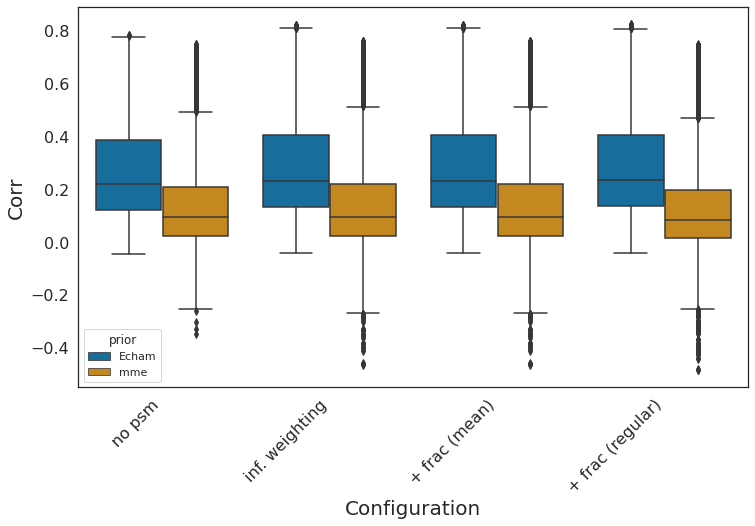

In [77]:
box_plot(df,name='Speleothem PSM generated pseudoproxies (no karst filter)',model='Echam')

## Hovmöllerplot/Timeseries

In [52]:
paths_real=['/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/Echam_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/GISS_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/iCESM_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/iHadCM3_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/isoGSM_0000_2015.nc']


In [63]:
paths_real2=['/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/Echam_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/GISS_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/iCESM_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/iHadCM3_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/isoGSM_0000_2015.nc']


In [54]:
echam_recon=xr.open_dataset(paths_real[0])

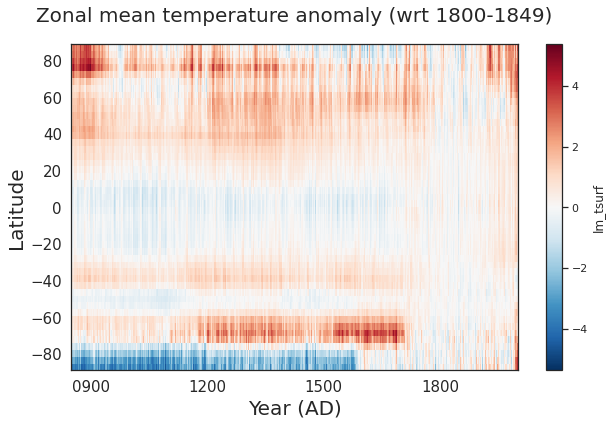

In [125]:
start='0850'
end='2000'

plt.figure(figsize=(10,6))
(echam_recon['lm_tsurf']-echam_recon['lm_tsurf'].sel(time=slice('1800','1849')).mean('time')).sel(time=slice(start,end)).T.plot()
plt.title('Zonal mean temperature anomaly (wrt 1800-1849)',fontsize=20,y=1.05)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year (AD)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

savefig='echam_hov'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')

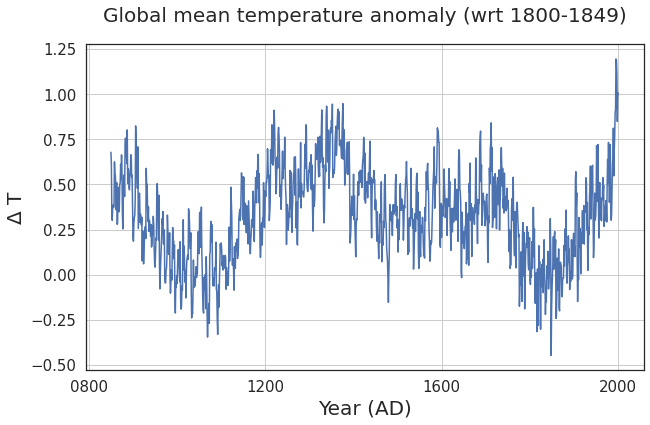

In [129]:
start='0850'
end='2000'

plt.figure(figsize=(10,6))
(echam_recon['gm_tsurf']-echam_recon['gm_tsurf'].sel(time=slice('1800','1849')).mean('time')).sel(time=slice(start,end)).T.plot()
plt.title('Global mean temperature anomaly (wrt 1800-1849)',fontsize=20,y=1.05)
plt.ylabel(r'$\Delta$ T',fontsize=20)
plt.xlabel('Year (AD)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

savefig='echam_gmt'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')

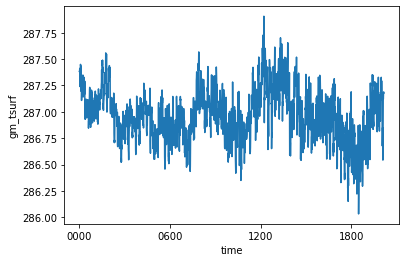

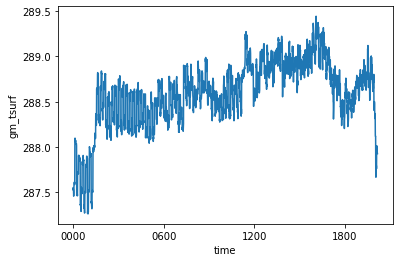

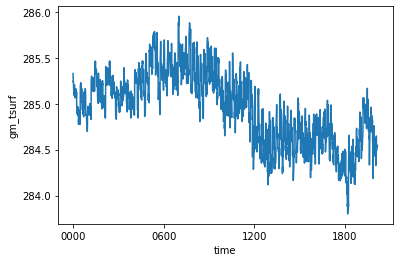

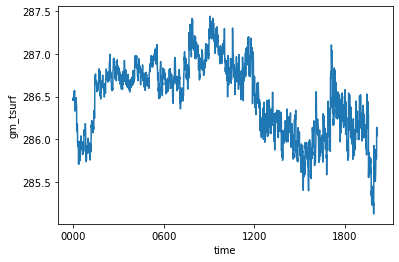

In [65]:
for i in range(5):
    try:
        xr.open_dataset(paths_real2[i])['gm_tsurf'].plot()
        plt.show()
    except:
        pass